✅ Dataset loaded successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

Missing values in each column:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

✅ KNN Model Evaluation Results
--------------------------------
Confusion Matrix:
 [[80 20]
 [26 28]]
Accuracy: 0.7013
Error Rate: 0.2987
Precision: 0

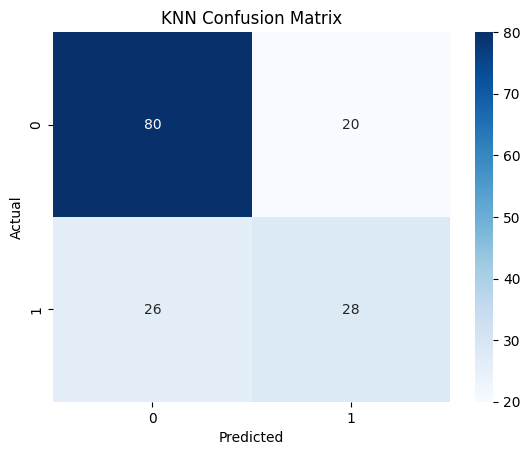

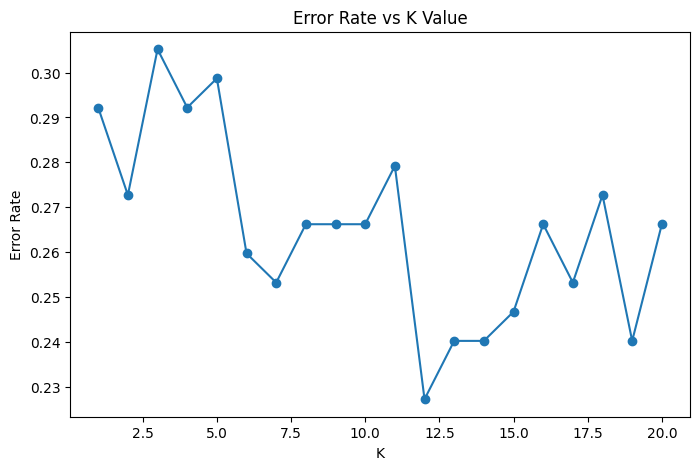

In [29]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\comp\Desktop\kuki\vs code\lab3\lab-3\ML\Knearest3rd\diabetes.csv")  # ensure this file is in your working directory
print("✅ Dataset loaded successfully!")
print(df.head())

# Step 3: Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Step 4: Split dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)  # all columns except target
y = df['Outcome']               # target column

# Step 5: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Feature Scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Build and Train the KNN Model
k = 5  # you can adjust this
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = knn.predict(X_test)

# Step 9: Evaluate the Model
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
error_rate = 1 - acc
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Step 10: Display Results
print("\n✅ KNN Model Evaluation Results")
print("--------------------------------")
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {acc:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Step 11: Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: Optional - Try different k values
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(np.mean(y_pred != y_test))

plt.figure(figsize=(8,5))
plt.plot(range(1,21), error_rates, marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
